<a href="https://colab.research.google.com/github/Saultr21/IA-Y-BIGDATA/blob/main/SNS/SNS_ACT3_5/Actividad_3_5_%E2%80%93_Clasificaci%C3%B3n_de_vinos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saúl Tomás Trujillo Rodríguez

# **Paso 1: Instalación e importación de librerías**
Instalamos las librerías necesarias y las importamos para su uso en el análisis de datos y la clasificación.


In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import joblib

# **Paso 2: Importación del dataset**
Cargamos el dataset de vinos tintos desde la fuente oficial y mostramos las primeras filas.


In [11]:
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
df_red = pd.read_csv(url_red, sep=';')
print("Dataset vinos blancos:")
df_red.head()

Dataset vinos blancos:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# **Paso 3: Matriz de correlación**
Generamos una matriz de correlación para visualizar las relaciones entre las características del dataset.


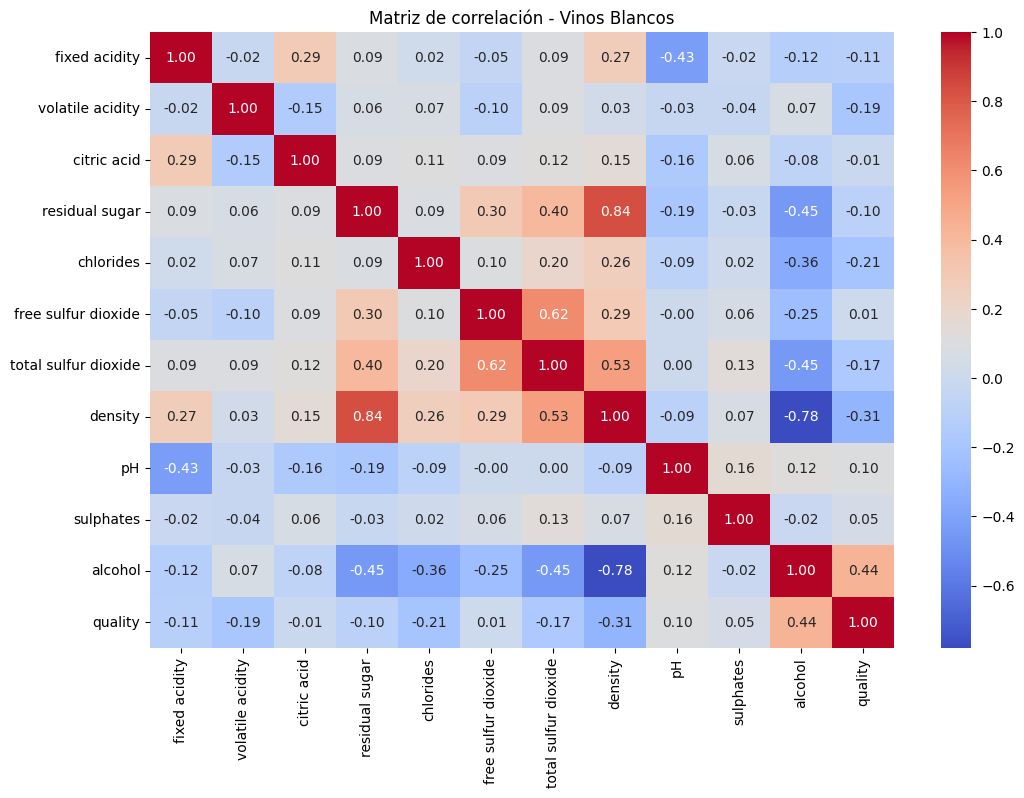

In [13]:
plt.figure(figsize=(12,8))
corr = df_red.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de correlación - Vinos Blancos')
plt.show()

# **Paso 4: Selección de características**
Aplicamos `SelectKBest` para seleccionar las 5 características más relevantes en relación con la variable `quality`.


In [14]:
X_red = df_red.drop('quality', axis=1)
y_red = df_red['quality']

# Selección con SelectKBest
selector = SelectKBest(f_classif, k=5)
X_new_red = selector.fit_transform(X_red, y_red)
selected_features_red = X_red.columns[selector.get_support()]
print("\nCaracterísticas seleccionadas (tintos):")
print(selected_features_red)


Características seleccionadas (tintos):
Index(['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density',
       'alcohol'],
      dtype='object')


# **Paso 5: Comparativa de modelos con Cross Validation**
Creamos pipelines para comparar los modelos Naive Bayes y K-Nearest Neighbors (KNN) utilizando validación cruzada.


In [15]:
# Creación de pipelines
nb_pipeline = Pipeline([
    ('selector', SelectKBest(f_classif, k=5)),
    ('model', GaussianNB())
])

knn_pipeline = Pipeline([
    ('selector', SelectKBest(f_classif, k=5)),
    ('model', KNeighborsClassifier())
])

# Validación cruzada
nb_scores = cross_val_score(nb_pipeline, X_red, y_red, cv=5)
knn_scores = cross_val_score(knn_pipeline, X_red, y_red, cv=5)

print("\nComparativa de modelos (tintos):")
print(f"Naive Bayes: {np.mean(nb_scores):.2f} (+/- {np.std(nb_scores):.2f})")
print(f"KNN: {np.mean(knn_scores):.2f} (+/- {np.std(knn_scores):.2f})")



Comparativa de modelos (tintos):
Naive Bayes: 0.47 (+/- 0.02)
KNN: 0.42 (+/- 0.01)


# **Paso 6: Entrenamiento del mejor modelo**
Entrenamos el mejor modelo (KNN) con los datos y generamos la matriz de confusión.


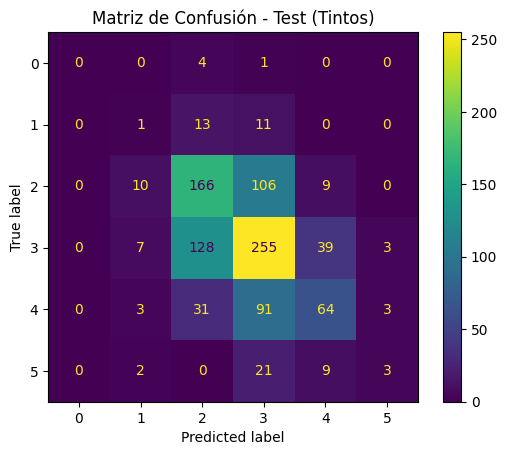

In [16]:
# a. Matriz de confusión
X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)
best_model = knn_pipeline.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Matriz de Confusión - Test (Tintos)')
plt.show()

# **Paso 7: Exportación e Importación del Modelo**
Guardamos el modelo entrenado en un archivo y lo volvemos a cargar para hacer predicciones.


In [17]:
# b. Exportar modelo
joblib.dump(best_model, 'mejor_modelo_tinto.pkl')

# c. Importar modelo
loaded_model = joblib.load('mejor_modelo_tinto.pkl')

# **Paso 8: Predicción sobre todo el dataset**
Usamos el modelo entrenado para predecir la calidad del vino en todo el dataset y generamos la matriz de confusión.


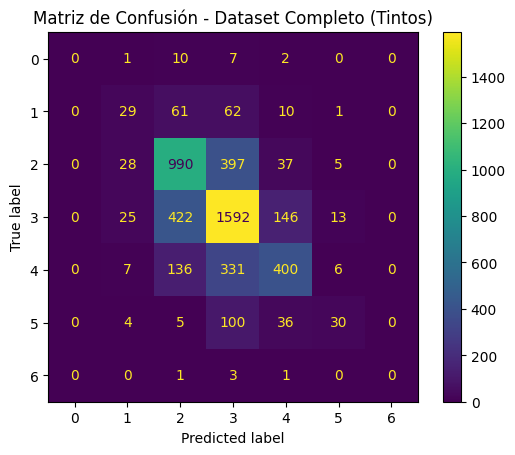

In [18]:
y_full_pred = loaded_model.predict(X_red)
cm_full = confusion_matrix(y_red, y_full_pred)
disp_full = ConfusionMatrixDisplay(cm_full)
disp_full.plot()
plt.title('Matriz de Confusión - Dataset Completo (Tintos)')
plt.show()

# **Paso 9: Comparación de resultados**
Comparamos la precisión del modelo durante el entrenamiento y en el dataset completo.


In [19]:
accuracy_entrenamiento = np.mean(knn_scores)
accuracy_final = accuracy_score(y_red, y_full_pred)
print(f"\nPrecisión durante entrenamiento (CV): {accuracy_entrenamiento:.2f}")
print(f"Precisión en dataset completo: {accuracy_final:.2f}")
print(f"Diferencia: {abs(accuracy_entrenamiento - accuracy_final):.2f}")


Precisión durante entrenamiento (CV): 0.42
Precisión en dataset completo: 0.62
Diferencia: 0.20
